In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from material_params import Quartz
from device_config import run_on_device
from plots import plot_permittivity

plt.rcParams.update({'mathtext.default': 'regular' })
plt.rcParams.update({'font.family': 'Arial' })

In [3]:
quartz = Quartz(frequency_length=900, run_on_device_decorator=run_on_device)
quartz_ext, quartz_ord = quartz.permittivity_fetch()

In [46]:
def plot_permittivity(material, eps_ext, eps_ord):
    plt.rcParams.update(
        {
            "font.family": "Arial",
        }
    )
    plt.rcParams['axes.linewidth'] = 1.8 #set the value globally

    fig, axs = plt.subplots(
        1, figsize=(8, 5), sharex=True, gridspec_kw={"hspace": 0.1}
    )

    # Plot real part of permittivity
    axs.plot(
        material.frequency,
        tf.math.real(eps_ext),
        label=r"$\mathrm{Re}(\varepsilon_\mathrm{ext})$",
        color = 'blue'
    )
    axs.plot(
        material.frequency,
        tf.math.real(eps_ord),
        label=r"$\mathrm{Re}(\varepsilon_\mathrm{ord})$",
        color= 'red'
    )
    axs.axhline(y=0, color="black", linewidth=1)
    axs.set_ylabel(r"$\mathrm{Re}(\epsilon)$", fontsize = 26)
    axs.legend()
    axs.set_xlim(410, 600)
    axs.set_xlabel(r"Wavenumber (cm$^{-1})$", fontsize = 24)

    # Save and show figure
    plt.savefig(material.name + "Spectrum.png", dpi=300, bbox_inches="tight")
    plt.subplots_adjust(hspace=0.1)
    plt.show()
    plt.close()

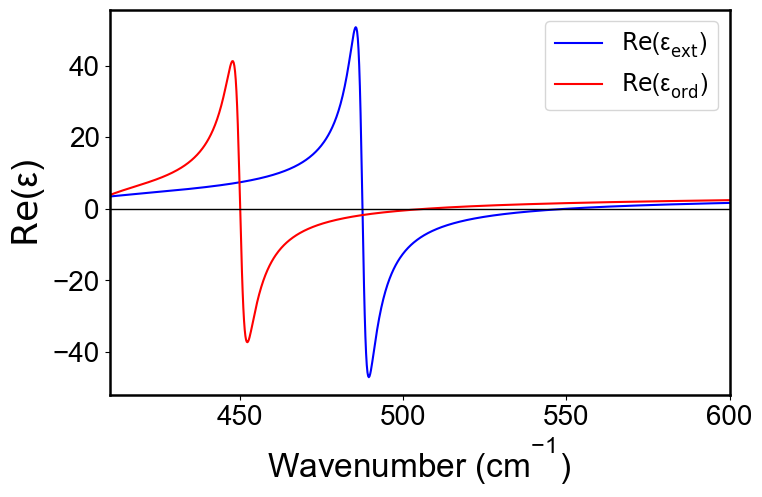

In [47]:
plot_permittivity(quartz, quartz_ext, quartz_ord)